# Classification Dataset

___

 ### By: Ahmed Lotfy

## 1) Importing Libriries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest, chi2 , f_classif

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error

from sklearn.model_selection import train_test_split




## 2) Reading Data

Reading the CSV File and Displaying the First Few Rows

In [2]:
df=pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.shape


(700, 11)

## 3) Data analysis

In this function, I’m calculating the frequency of each unique value in a specific column of a DataFrame. The function is useful for exploring categorical data and understanding how frequently each category appears in a particular column.

In [4]:
def feature_count(column):

  return df[column].value_counts()

return the names of the columns

In [5]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

count Operating Systems by feature_count Function


In [6]:
feature_count('Operating System')

Operating System
Android    554
iOS        146
Name: count, dtype: int64

count Device Models by feature_count Function


In [7]:
feature_count('Device Model')


Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

a statistical summary of the 'Age' column

In [8]:
df[['Age']].describe()

,Age
count,700.000000
mean,38.482857
std,12.012916
min,18.000000
25%,28.000000
50%,38.000000
75%,49.000000
max,59.000000


categorize individuals into age groups based on their age

In [9]:
def AgeGroupByAge(column):

    if column['Age'] <=30 :

        return 'young'

    elif column['Age'] <=40:

        return 'young adult'

    elif column['Age'] <= 55:

        return 'Middle adult'

    else:

        return 'old'

Apply the function to create a new column for age groups

In [10]:
df['AgeGroup'] = df.apply(AgeGroupByAge, axis=1)

In [11]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,AgeGroup
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,young adult
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,Middle adult
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Middle adult
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,young
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,young adult


count AgeGroupby feature_count Function


In [12]:
feature_count('AgeGroup')

AgeGroup
Middle adult    253
young           218
young adult     168
old              61
Name: count, dtype: int64

## 4) Cleaning Data

**Nulls**

*   Check for missing values in each column

*   Display the count of missing values








In [13]:
missing_values = df.isnull().sum()

print(missing_values)

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
AgeGroup                      0
dtype: int64


* Drop User ID column

In [14]:
df.drop('User ID', axis=1, inplace=True)

--Reset the index and drop the old index column






















In [15]:
df.reset_index(inplace=True)

df.drop(['index'],axis = 1,inplace=True)

In [16]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,AgeGroup
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,young adult
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,Middle adult
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Middle adult
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,young
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,young adult


****Outliers****

a customizable function for creating box plots using Seaborn and Matplotlib


In [17]:
def BPlot(data,feature1,feature2 = None,hue = None) :

    fig, ax = plt.subplots(figsize=(10,6))

    if feature2 ==  None and hue == None :

        sns.boxplot(data[feature1],width=0.3,color='r')

    elif  feature2 !=  None and hue == None :

        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')

    elif  feature2 !=  None and hue != None :

        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')

    ax.set_title('Box Plot')

    plt.show()

descriptive statistics for the 'App Usage Time (min/day)' column for each gender group.

In [18]:
df.groupby('Gender')['App Usage Time (min/day)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,336.0,271.967262,174.232669,31.0,118.25,230.0,423.5,598.0
Male,364.0,270.354396,180.130832,30.0,104.75,222.0,445.5,595.0


create a box plot of App Usage Time (min/day) by Gender to display outliers


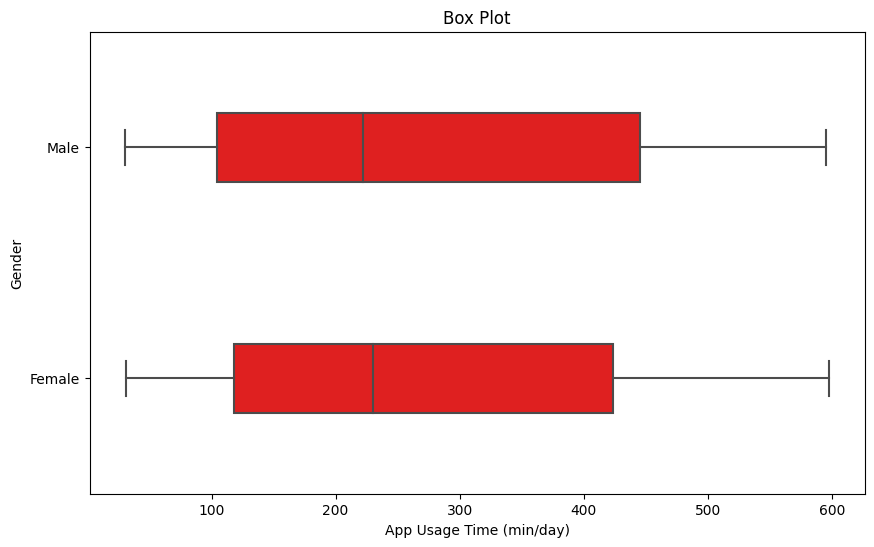

In [19]:
BPlot(df,'App Usage Time (min/day)','Gender')

descriptive statistics for the 'Battery Drain (mAh/day)' column for each gender group.

In [20]:
df.groupby('Gender')['Battery Drain (mAh/day)'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,336.0,1519.815476,793.210963,302.0,747.0,1500.0,2177.0,2993.0
Male,364.0,1530.090659,843.420783,303.0,684.0,1530.0,2283.5,2971.0


create a box plot of Battery Drain (mAh/day) by Gender to display outliers


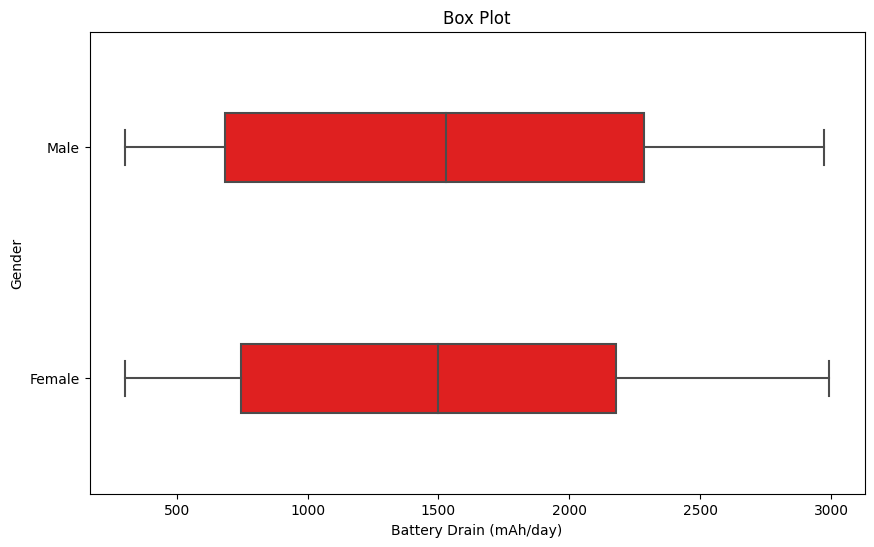

In [21]:
BPlot(df,'Battery Drain (mAh/day)','Gender')


descriptive statistics for the 'Data Usage (MB/day)' column for each gender group.








In [22]:
df.groupby('Gender')['Data Usage (MB/day)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,336.0,914.321429,622.750886,102.0,365.00,818.5,1243.00,2497.0
Male,364.0,943.978022,656.901886,105.0,389.25,832.5,1405.25,2481.0


create a box plot of Data Usage (MB/day) by Gender to display outliers


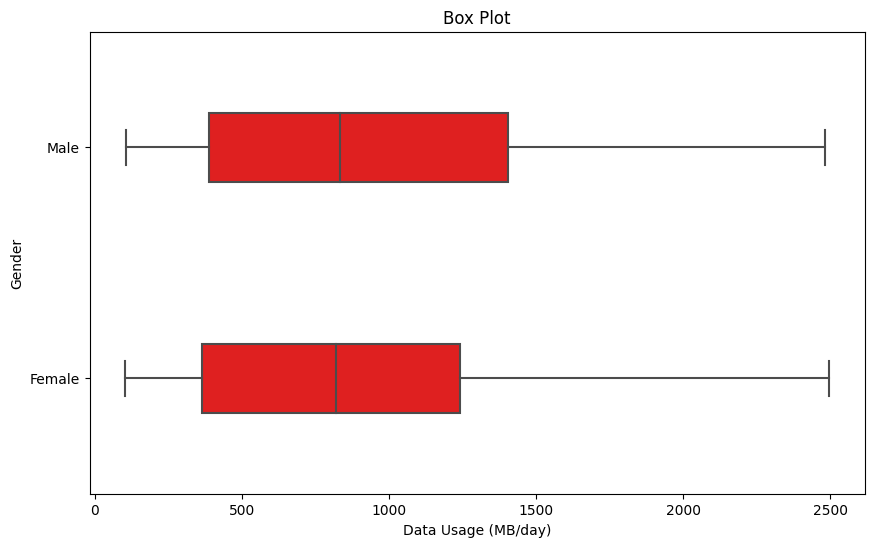

In [23]:
BPlot(df,'Data Usage (MB/day)','Gender')

 identify and handle outliers in specific columns of a Pandas DataFrame (df). It uses the Interquartile Range (IQR) method to detect outliers and replaces them with NaN

In [24]:
for x in ['App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)','Data Usage (MB/day)']:

    q75,q25 = np.percentile(df.loc[:,x],[75,25])

    intr_qr = q75-q25

    max = q75+(3*intr_qr)

    min = q25-(3*intr_qr)

    print(f'for {x} min outlier has {df.loc[df[x] < min,x].shape[0]} rows and mx outlier has {df.loc[df[x] > max,x].shape[0]} rows' )

    df.loc[df[x] < min,x] = np.nan

    df.loc[df[x] > max,x] = np.nan

df = df.dropna(axis = 0)

df.reset_index(inplace=True)

df.drop(['index'],axis = 1,inplace=True)


for App Usage Time (min/day) min outlier has 0 rows and mx outlier has 0 rows
for Screen On Time (hours/day) min outlier has 0 rows and mx outlier has 0 rows
for Battery Drain (mAh/day) min outlier has 0 rows and mx outlier has 0 rows
for Data Usage (MB/day) min outlier has 0 rows and mx outlier has 0 rows


## 5) Data Visualization

In [25]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,AgeGroup
0,Google Pixel 5,Android,393.0,6.4,1872.0,67,1122.0,40,Male,4,young adult
1,OnePlus 9,Android,268.0,4.7,1331.0,42,944.0,47,Female,3,Middle adult
2,Xiaomi Mi 11,Android,154.0,4.0,761.0,32,322.0,42,Male,2,Middle adult
3,Google Pixel 5,Android,239.0,4.8,1676.0,56,871.0,20,Male,3,young
4,iPhone 12,iOS,187.0,4.3,1367.0,58,988.0,31,Female,3,young adult


The RelKPlot function is designed to create a series of Kernel Density Estimate (KDE) plots to visualize the distribution of a specified feature within a DataFrame (df). It compares the overall distribution with the distributions of two selected groups based on a specified feature

In [26]:
def RelKPlot(feature,fristName,secondName,SelectedFeture,fristValue,secondValue) :

    global df

    fig, ax = plt.subplots(figsize=(30,8))

    plt.subplot(1,3,1)

    plt.title('total')

    Data = df

    sns.kdeplot(Data[feature], shade=True)

    plt.subplot(1,3,2)

    plt.title(fristName)

    Data = df[df[SelectedFeture]==fristValue]

    sns.kdeplot(Data[feature], shade=True,color='blue')

    plt.subplot(1,3,3)

    plt.title(secondName)

    Data = df[df[SelectedFeture]==secondValue]

    sns.kdeplot(Data[feature], shade=True ,color='salmon')

    plt.tight_layout()

    plt.show()

1. Total Distribution Plot:

   * the first subplot will display the KDE plot of 'App Usage Time (min/day)' for all users in the DataFrame (df), giving a general idea of app usage across the entire dataset.

2. Male Users Distribution Plot:

   * The second subplot will specifically show the KDE plot of 'App Usage Time (min/day)' for users identified as male. The area under the curve will be shaded to visualize the density of app usage times among male users.



3. Female  Users Distribution Plot:

   * The third subplot will display the KDE plot for female users, providing a visual comparison to the male users.




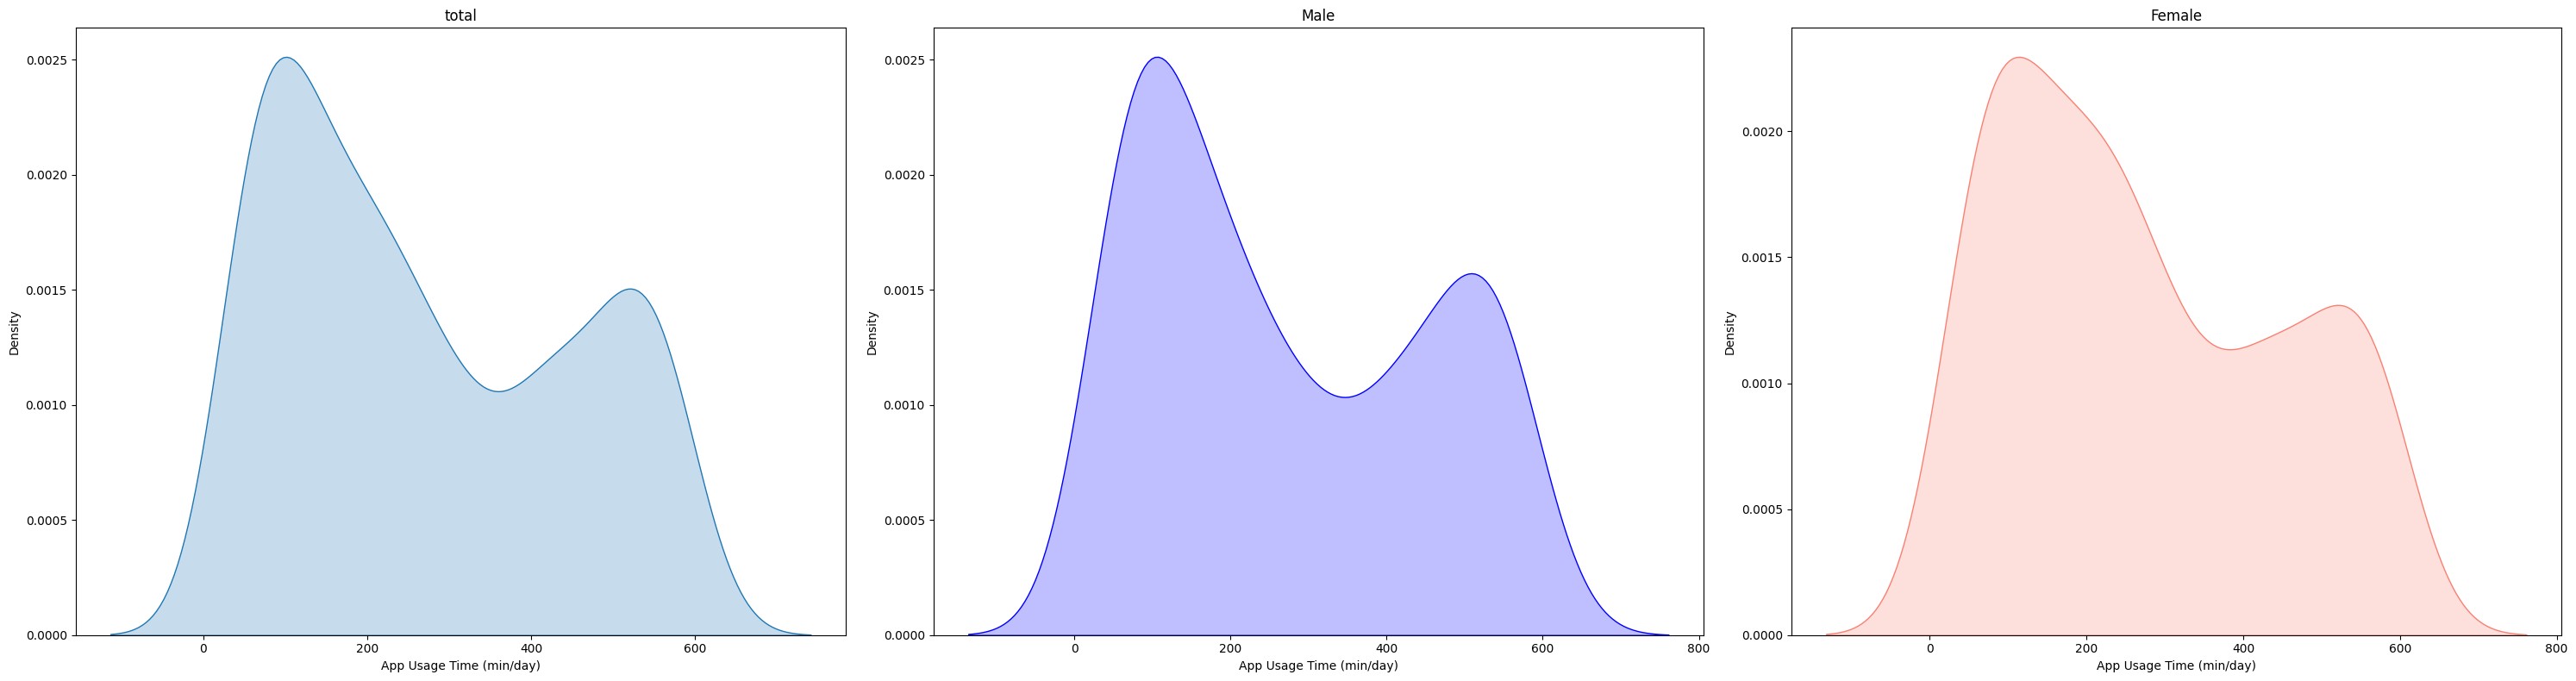

In [27]:
RelKPlot('App Usage Time (min/day)','Male','Female','Gender','Male','Female')

1. Total Distribution Plot:

   * The first subplot will display the KDE plot of 'User Behavior Class' for all users in the DataFrame. However, since this is a categorical variable, the output might not be meaningful or useful.

2. Male Users Distribution Plot:

   * The second subplot will attempt to show the KDE plot for male users based on the 'User Behavior Class'. The function will attempt to create a density plot, which might not produce the expected results for categorical data.

3. Female Users Distribution Plot:

   * The third subplot will do the same for female users, leading to similar results.


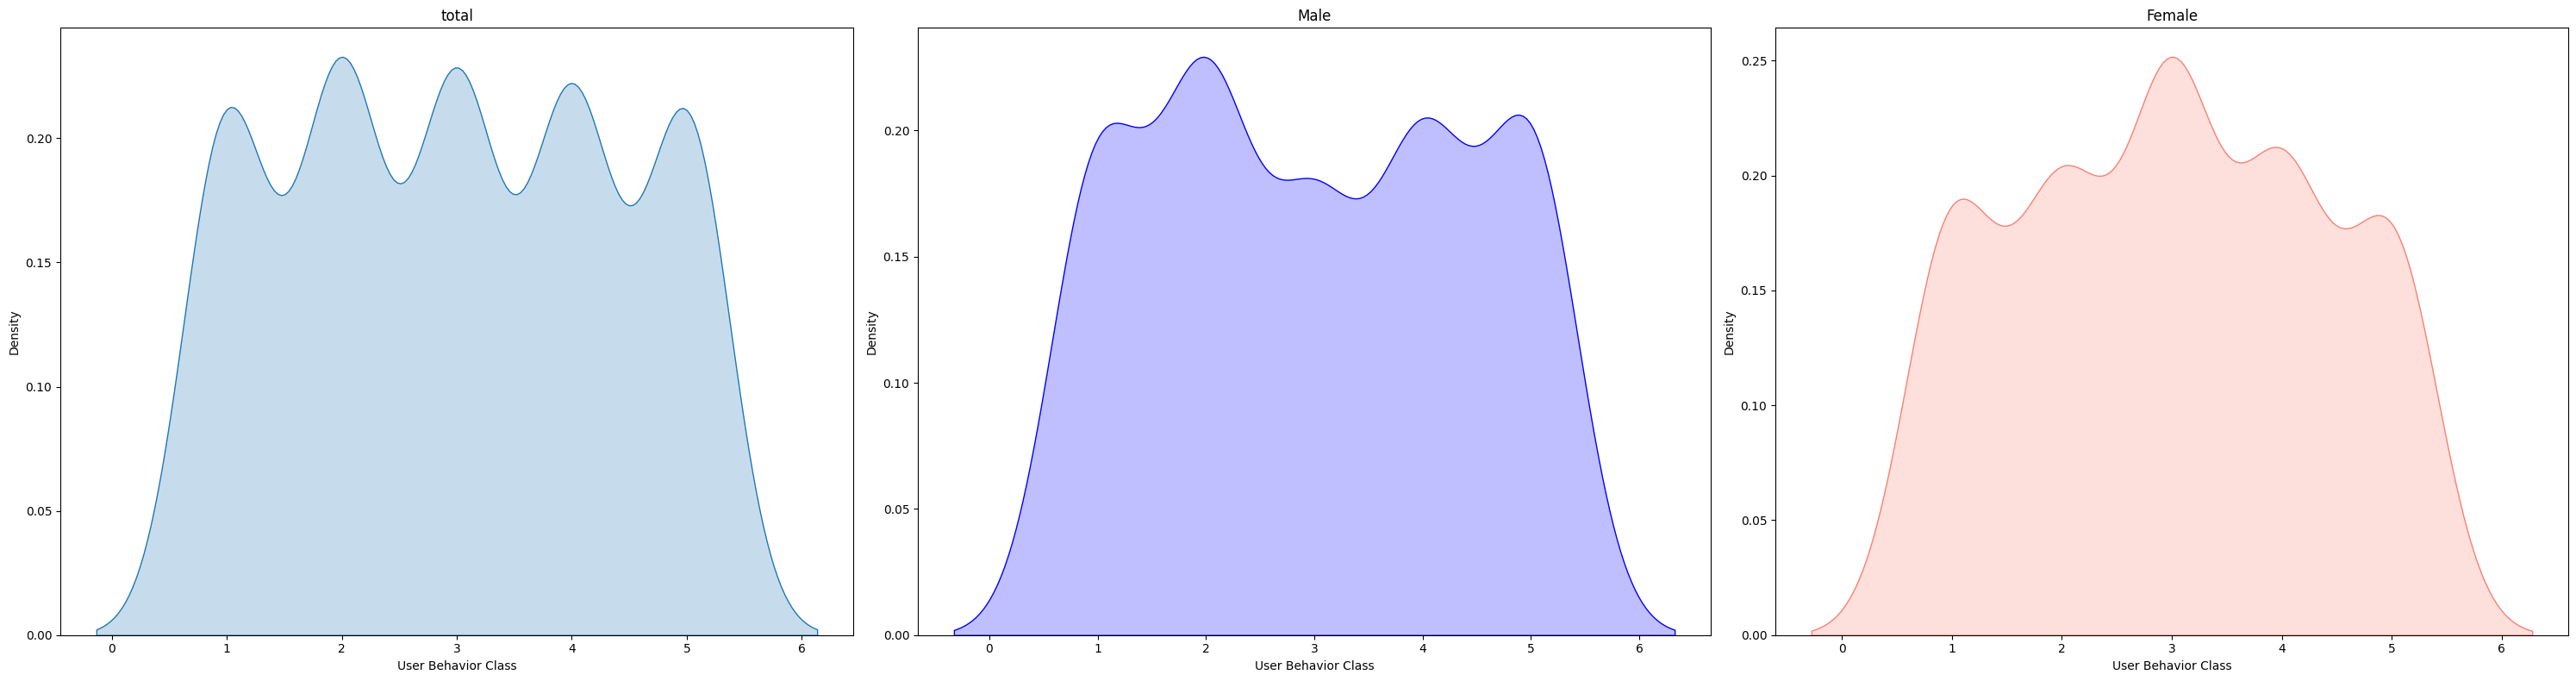

In [28]:
RelKPlot('User Behavior Class','Male','Female','Gender','Male','Female')


creates a count plot using the Seaborn library to visualize the distribution of the "Operating System" feature in  DataFrame (df), differentiated by gender. Let’s break down the code and discuss its components and expected output.

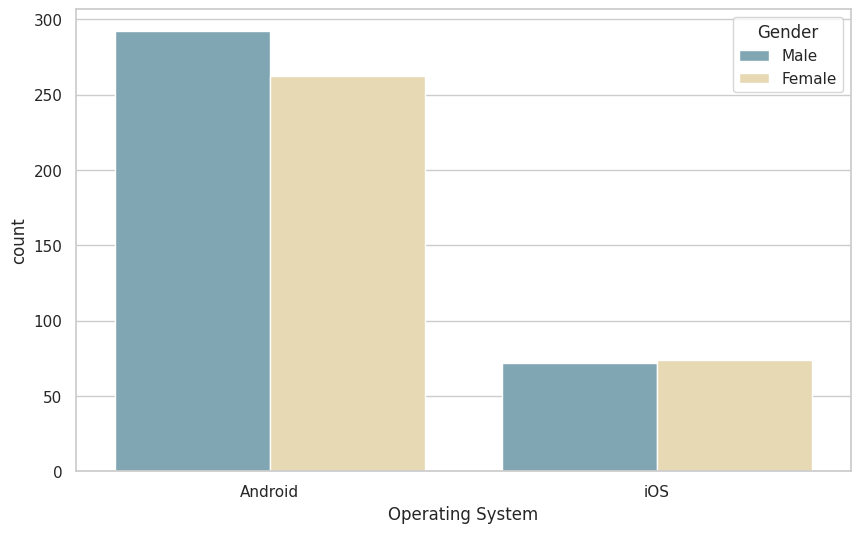

In [29]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(x="Operating System", hue='Gender', data=df,palette='blend:#7AB,#EDA')

The function RelVPiePlot provided is designed to create pie charts that visualize the distribution of a specified categorical feature within a DataFrame. It generates three pie charts: one for the total distribution, one for a specified subset based on a first value, and another for a second specified subset based on a second value.

In [30]:
def RelVPiePlot(feature,fristName,secondName,SelectedFeture,fristValue,secondValue) :

    global df

    fig, ax = plt.subplots(figsize=(30,8))



    plt.subplot(1,3,1)

    plt.title(feature)

    Data = df

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('magma',3),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,3,2)

    plt.title(fristName)

    Data = df[df[SelectedFeture]==fristValue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('Blues',3),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,3,3)

    plt.title(secondName)

    Data = df[df[SelectedFeture]==secondValue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('RdPu',3),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.show()

This function call effectively provides insights into how different genders use various operating systems. By analyzing the pie charts generated, you can quickly gauge the preferences of male and female users regarding operating systems in your dataset.

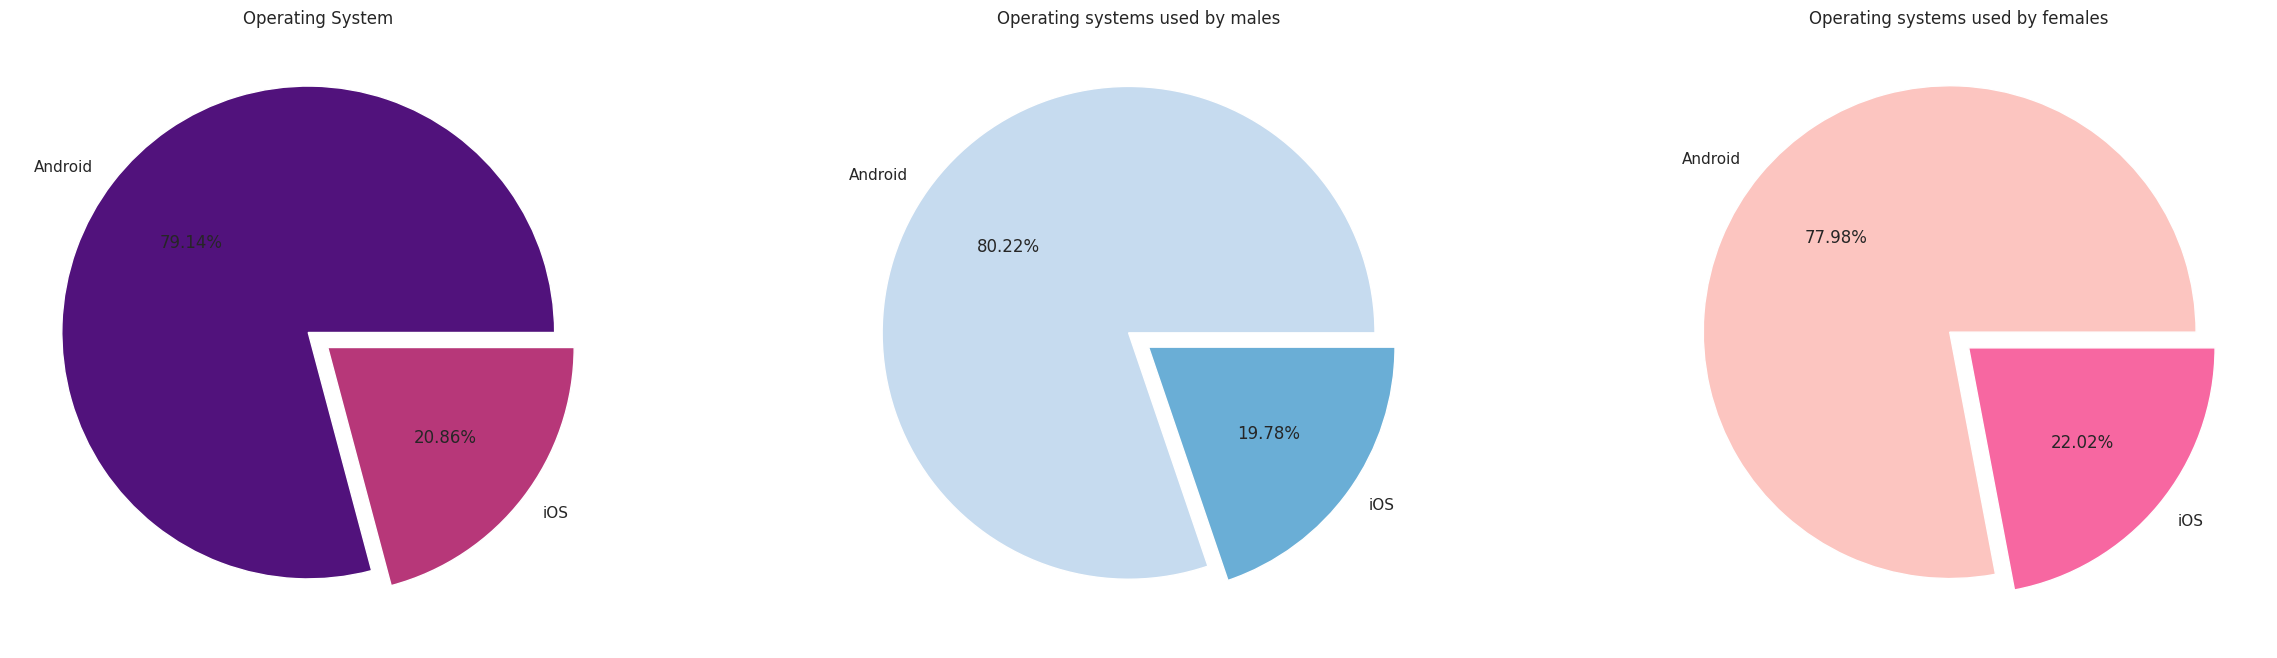

In [31]:
RelVPiePlot('Operating System','Operating systems used by males','Operating systems used by females','Gender','Male','Female')

This function call effectively allows you to visualize and compare the device model preferences of male and female users in your dataset. By analyzing the generated pie charts, you can gain insights into gender-based trends in device usage.

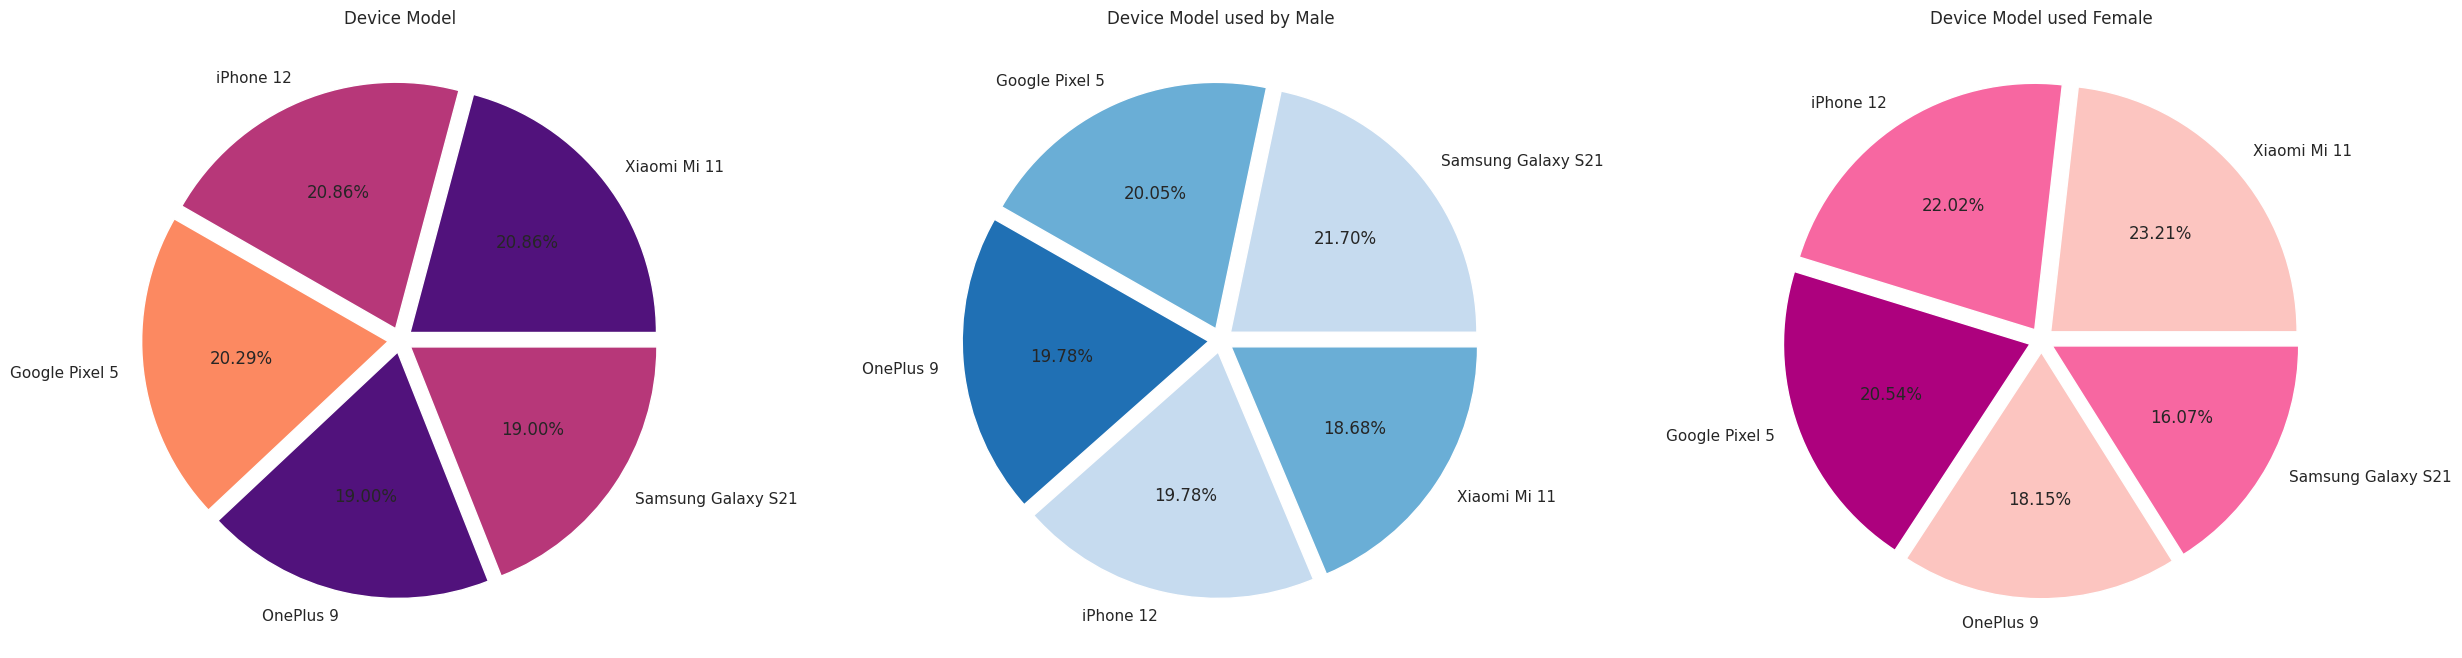

In [32]:
RelVPiePlot('Device Model','Device Model used by Male','Device Model used Female','Gender','Male','Female')

This function call allows to effectively visualize the distribution of age groups among male and female users in your dataset. By analyzing the generated pie charts, you can identify trends and differences in age distribution between genders.

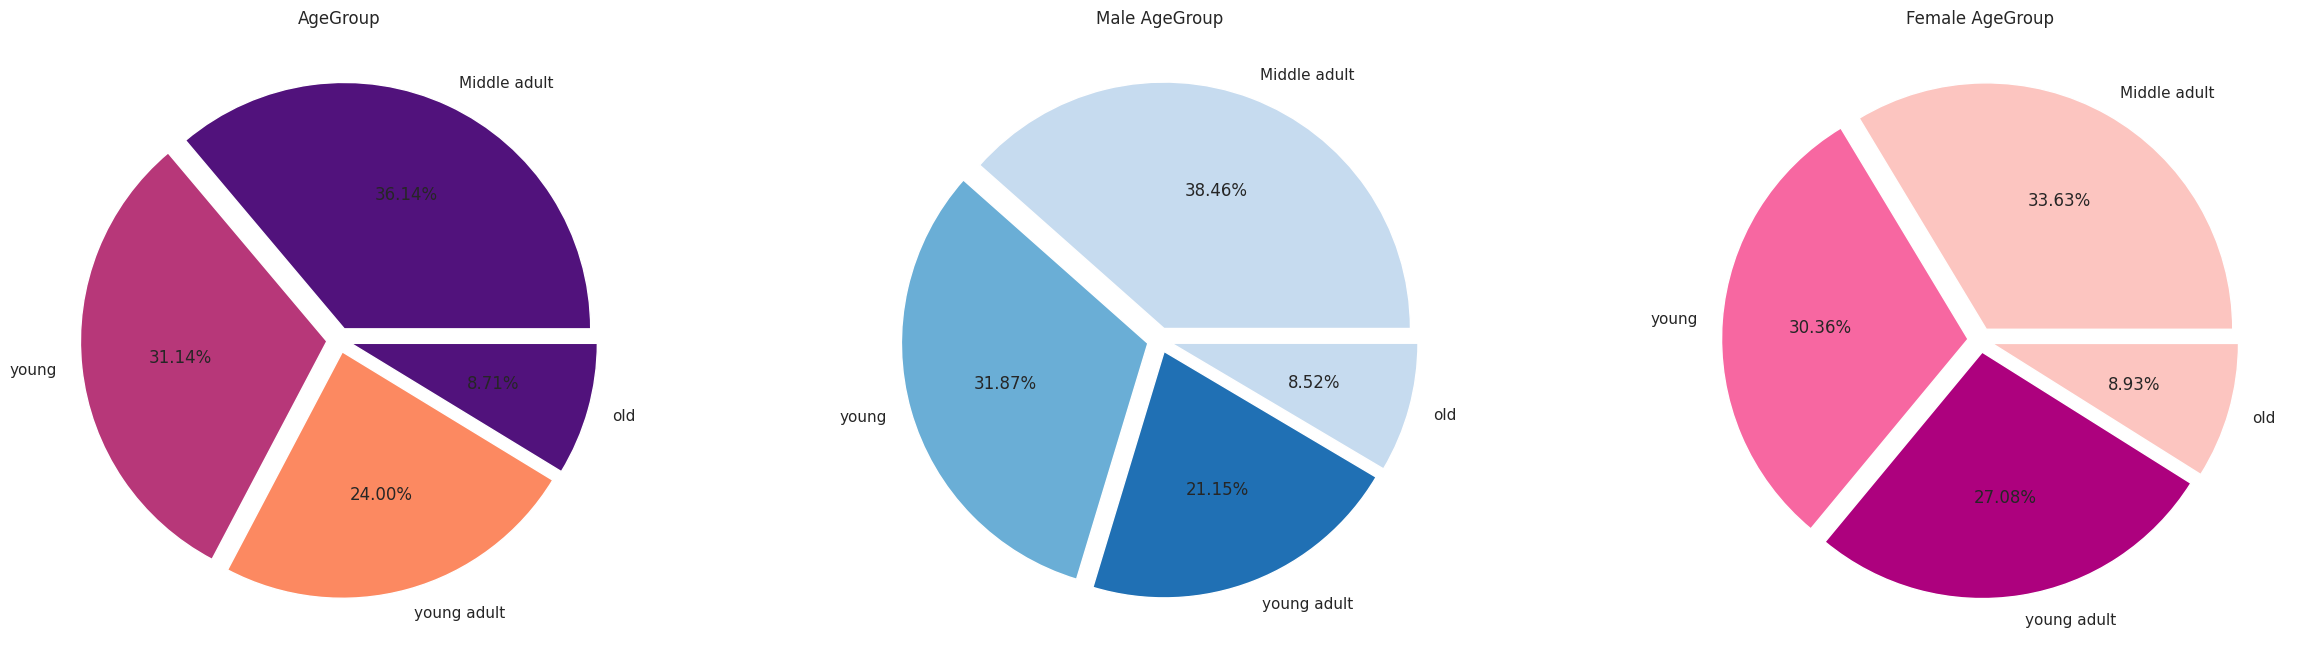

In [33]:
RelVPiePlot('AgeGroup','Male AgeGroup','Female AgeGroup','Gender','Male','Female')

This function call allows to effectively visualize the distribution of User Behavior Class among male and female users in your dataset. By analyzing the generated pie charts, you can identify trends and differences in age distribution between genders.

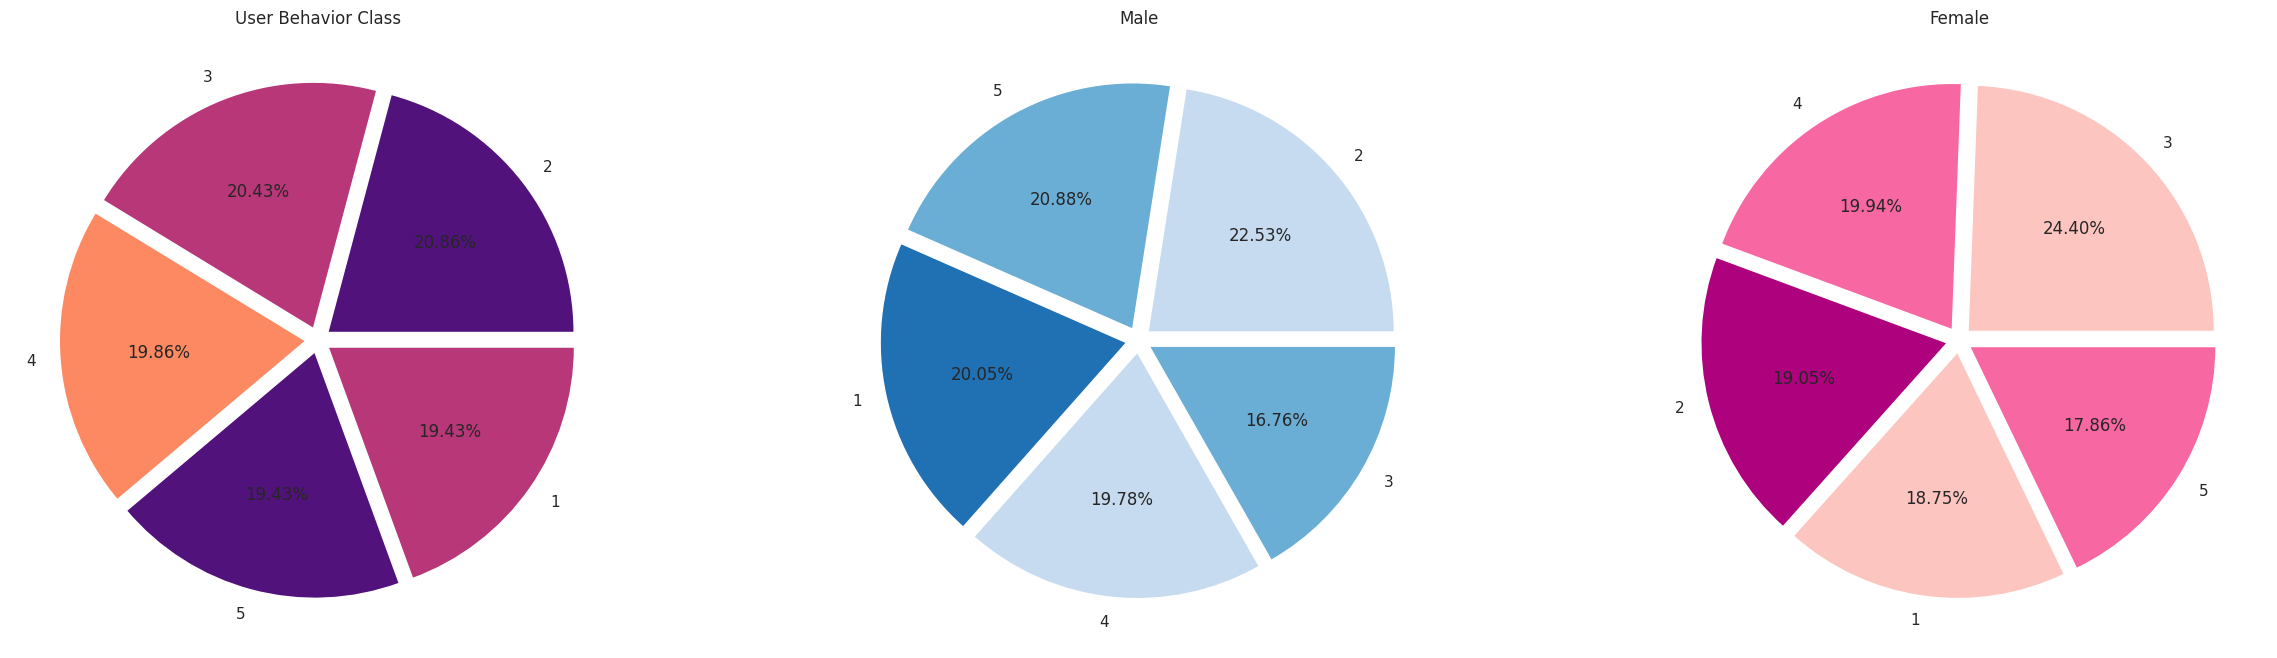

In [34]:
RelVPiePlot('User Behavior Class','Male','Female','Gender','Male','Female')

The function RelVPiePlotGA is designed to create multiple pie charts that visualize the distribution of a specified categorical feature across different groups defined by another feature. This is useful for comparative analysis, allowing  to see how a certain characteristic varies among various categories within your dataset

In [35]:
def RelVPiePlotGA(feature,fristName,secondName,thirdName,fourthName,fifthName,SelectedFeture,fristValue,secondValue,thirdValue,fourthvalue,fifthvalue) :

    global df

    fig, ax = plt.subplots(figsize=(30,6))



    plt.subplot(1,6,1)

    plt.title(feature)

    Data = df

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('magma',4),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,6,2)

    plt.title(f'{feature} belong to {fristName}')

    Data = df[df[SelectedFeture]==fristValue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('crest', 4),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,6,3)

    plt.title(f'{feature} belong to {secondName}')

    Data = df[df[SelectedFeture]==secondValue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('Blues', 4),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,6,4)

    plt.title(f'{feature} belong to {thirdName}')

    Data = df[df[SelectedFeture]==thirdValue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('cool',4),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,6,5)

    plt.title(f'{feature} belong to {fourthName}')

    Data = df[df[SelectedFeture]==fourthvalue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('Greens',4),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.subplot(1,6,6)

    plt.title(f'{feature} belong to {fifthName}')

    Data = df[df[SelectedFeture]==fifthvalue]

    plt.pie(Data[feature].value_counts(),labels=list(Data[feature].value_counts().index),autopct ='%1.2f%%' ,colors=  sns.color_palette('Greens', 4),

            labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()))] )

    plt.show()

By calling RelVPiePlotGA with the provided parameters, we can effectively visualize and compare the distribution of age groups across different user behavior classes in your dataset.

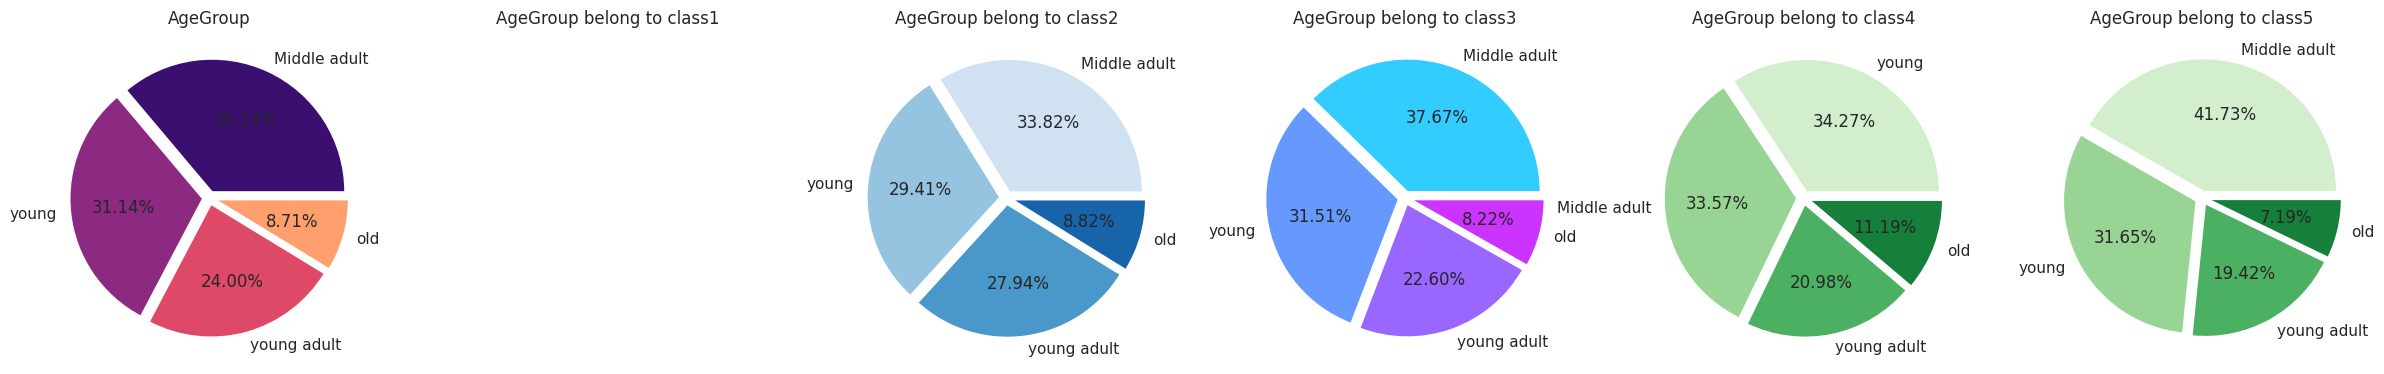

In [36]:
RelVPiePlotGA('AgeGroup','class1','class2','class3','class4','class5','User Behavior Class',0,1,2,3,4)

## 6)Feature Extraction

App Usage Total Over a Week (in min)

In [37]:
df['App Usage Total (week)'] = df['App Usage Time (min/day)'] * 7

Ratio of App Usage to Screen Time

In [38]:
df['App Usage to Screen Time Ratio'] = df['App Usage Time (min/day)'] / (df['Screen On Time (hours/day)'] * 60)

Categorizing Number of Apps Installed

In [39]:
df['App Installation Category'] = pd.cut(df['Number of Apps Installed'], bins=[0, 20, 40, float('inf')],

                                         labels=['Low', 'Medium', 'High'])

In [40]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,AgeGroup,App Usage Total (week),App Usage to Screen Time Ratio,App Installation Category
0,Google Pixel 5,Android,393.0,6.4,1872.0,67,1122.0,40,Male,4,young adult,2751.0,1.023438,High
1,OnePlus 9,Android,268.0,4.7,1331.0,42,944.0,47,Female,3,Middle adult,1876.0,0.950355,High
2,Xiaomi Mi 11,Android,154.0,4.0,761.0,32,322.0,42,Male,2,Middle adult,1078.0,0.641667,Medium
3,Google Pixel 5,Android,239.0,4.8,1676.0,56,871.0,20,Male,3,young,1673.0,0.829861,High
4,iPhone 12,iOS,187.0,4.3,1367.0,58,988.0,31,Female,3,young adult,1309.0,0.724806,High


## 7)Data Splitting

In [41]:
X = df.drop(['User Behavior Class'], axis=1)

y = df['User Behavior Class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)

print('X_test shape is ' , X_test.shape)

print('y_train shape is ' , y_train.shape)

print('y_test shape is ' , y_test.shape)

X_train shape is  (525, 13)
X_test shape is  (175, 13)
y_train shape is  (525,)
y_test shape is  (175,)


In [43]:
X_train.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,AgeGroup,App Usage Total (week),App Usage to Screen Time Ratio,App Installation Category
336,Samsung Galaxy S21,Android,473.0,7.9,2292.0,62,1472.0,44,Male,Middle adult,3311.0,0.997890,High
689,Samsung Galaxy S21,Android,541.0,9.5,2424.0,98,1550.0,32,Male,young adult,3787.0,0.949123,High
632,iPhone 12,iOS,496.0,10.2,2587.0,84,1921.0,56,Female,old,3472.0,0.810458,High
627,iPhone 12,iOS,227.0,5.2,1446.0,46,920.0,59,Male,old,1589.0,0.727564,High
250,OnePlus 9,Android,42.0,1.4,324.0,13,272.0,29,Female,young,294.0,0.500000,Low


In [44]:
X_test.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,AgeGroup,App Usage Total (week),App Usage to Screen Time Ratio,App Installation Category
266,iPhone 12,iOS,181.0,4.1,1608.0,43,752.0,22,Female,young,1267.0,0.735772,High
386,OnePlus 9,Android,98.0,2.0,925.0,32,457.0,28,Male,young,686.0,0.816667,Medium
294,Samsung Galaxy S21,Android,580.0,8.5,2660.0,87,1795.0,52,Male,Middle adult,4060.0,1.137255,High
324,iPhone 12,iOS,445.0,7.5,2007.0,78,1115.0,23,Male,young,3115.0,0.988889,High
68,iPhone 12,iOS,516.0,10.2,2932.0,98,1547.0,31,Male,young adult,3612.0,0.843137,High


## 8)Data Encoding

In [45]:
categorical_columns = ['Device Model', 'Operating System', 'Gender', 'AgeGroup', 'App Installation Category']

In [46]:
label_encoders = {}

for column in categorical_columns:

    le = LabelEncoder()

    X_train[column] = le.fit_transform(X_train[column])

    X_test[column] = le.transform(X_test[column])

    label_encoders[column] = le

print(f"Training Set Sample: \n{X_train.head()}")




Training Set Sample: 
     Device Model  Operating System  App Usage Time (min/day)  \
336             2                 0                     473.0   
689             2                 0                     541.0   
632             4                 1                     496.0   
627             4                 1                     227.0   
250             1                 0                      42.0   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
336                         7.9                   2292.0   
689                         9.5                   2424.0   
632                        10.2                   2587.0   
627                         5.2                   1446.0   
250                         1.4                    324.0   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  AgeGroup  \
336                        62               1472.0   44       1         0   
689                        98               1550.0   32       1         

In [47]:
print(f"Training Set Sample: \n{X_train.head()}")


Training Set Sample: 
     Device Model  Operating System  App Usage Time (min/day)  \
336             2                 0                     473.0   
689             2                 0                     541.0   
632             4                 1                     496.0   
627             4                 1                     227.0   
250             1                 0                      42.0   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
336                         7.9                   2292.0   
689                         9.5                   2424.0   
632                        10.2                   2587.0   
627                         5.2                   1446.0   
250                         1.4                    324.0   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  AgeGroup  \
336                        62               1472.0   44       1         0   
689                        98               1550.0   32       1         

## 9)Data scalling

Training Data Scalling

In [48]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [49]:
X_train= pd.DataFrame(X_train)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.013257,-0.514840,1.157025,0.854407,0.940800,0.427476,0.848872,0.449864,0.994302,-1.198671,1.157025,0.850963,-0.750759
1,-0.013257,-0.514840,1.543794,1.376220,1.102150,1.774699,0.970810,-0.553018,0.994302,1.288690,1.543794,0.617586,-0.750759
2,1.378724,1.942351,1.287844,1.604513,1.301393,1.250779,1.550801,1.452747,-1.005731,-0.369551,1.287844,-0.045997,-0.750759
3,1.378724,1.942351,-0.242169,-0.026153,-0.093306,-0.171290,-0.014079,1.703468,0.994302,-0.369551,-0.242169,-0.442683,-0.750759
4,-0.709247,-0.514840,-1.294409,-1.265459,-1.464780,-1.406244,-1.027108,-0.803739,-1.005731,0.459569,-1.294409,-1.531692,0.492612


Test Data scalling

In [50]:
X_test = scaler.transform(X_test)

In [51]:
X_test= pd.DataFrame(X_test)

X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.378724,1.942351,-0.503807,-0.384899,0.104714,-0.283558,-0.276716,-1.388753,-1.005731,0.459569,-0.503807,-0.403403,-0.750759
1,-0.709247,-0.514840,-0.975893,-1.069779,-0.730149,-0.695210,-0.737894,-0.887312,0.994302,0.459569,-0.975893,-0.016283,1.735983
2,-0.013257,-0.514840,1.765617,1.050087,1.390624,1.363047,1.353823,1.118453,0.994302,-1.198671,1.765617,1.517893,-0.750759
3,1.378724,1.942351,0.997767,0.723954,0.592431,1.026242,0.290768,-1.305180,0.994302,0.459569,0.997767,0.807887,-0.750759
4,1.378724,1.942351,1.401599,1.604513,1.723103,1.774699,0.966121,-0.636592,0.994302,1.288690,1.401599,0.110392,-0.750759


## 10)Feature Selection

-select trainning data

In [52]:
FeatureSelection = SelectKBest(score_func=f_classif , k=7)  # Select 7 features


X_train_selected = FeatureSelection.fit_transform(X_train, y_train)

selected_features = FeatureSelection.get_support(indices=True)

selected_feature_names = X_train.columns[selected_features]

NewData = pd.DataFrame(X_train_selected, columns=[i for i, j in zip(X_train.columns, FeatureSelection.get_support()) if j])

NewData.head()

,2,3,4,5,6,10,12
0,1.157025,0.854407,0.940800,0.427476,0.848872,1.157025,-0.750759
1,1.543794,1.376220,1.102150,1.774699,0.970810,1.543794,-0.750759
2,1.287844,1.604513,1.301393,1.250779,1.550801,1.287844,-0.750759
3,-0.242169,-0.026153,-0.093306,-0.171290,-0.014079,-0.242169,-0.750759
4,-1.294409,-1.265459,-1.464780,-1.406244,-1.027108,-1.294409,0.492612


select test data

In [53]:
X_test_selected = FeatureSelection.transform(X_test)

X_test_selected = pd.DataFrame(X_test_selected, columns=selected_feature_names)

In [54]:
X_test_selected.head()

,2,3,4,5,6,10,12
0,-0.503807,-0.384899,0.104714,-0.283558,-0.276716,-0.503807,-0.750759
1,-0.975893,-1.069779,-0.730149,-0.695210,-0.737894,-0.975893,1.735983
2,1.765617,1.050087,1.390624,1.363047,1.353823,1.765617,-0.750759
3,0.997767,0.723954,0.592431,1.026242,0.290768,0.997767,-0.750759
4,1.401599,1.604513,1.723103,1.774699,0.966121,1.401599,-0.750759


## 11) Machine Learning Models

* Defining parameters for each model 

In [55]:

param_grid = {

    'LinearRegression': {},

    'SGDRegressor': {

        'alpha': [0.01, 0.1, 0.5],

        'penalty': ['l2', 'l1', 'elasticnet']

    },

    'Lasso': {

        'alpha': [0.1, 0.5, 1.0]

    },

    'Ridge': {

        'alpha': [0.1, 0.5, 1.0, 5.0]

    },

    'RandomForestRegressor': {

        'n_estimators': [100, 500, 1000],

        'max_depth': [5, 8, 10]

    },

    'GradientBoostingRegressor': {

        'n_estimators': [100, 500],

        'learning_rate': [0.01, 0.1, 0.5],

        'max_depth': [3, 5, 7]

    },

    'SVR': {

        'C': [0.1, 1.0, 10.0],

        'epsilon': [0.01, 0.1, 0.5]

    },

    'DecisionTreeRegressor': {

        'max_depth': [3, 5, 7, 10]

    },

    'KNeighborsRegressor': {

        'n_neighbors': [3, 5, 7]

    }

}

In [56]:
model_performance = {}

#Performing Grid Search 
for model_name in param_grid.keys():
    print(f'Performing Grid Search for {model_name}...')

    # تحديد النموذج
    if model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'SGDRegressor':
        model = SGDRegressor()
    elif model_name == 'Lasso':
        model = Lasso()
    elif model_name == 'Ridge':
        model = Ridge()
    elif model_name == 'RandomForestRegressor':
        model = RandomForestRegressor()
    elif model_name == 'GradientBoostingRegressor':
        model = GradientBoostingRegressor()
    elif model_name == 'SVR':
        model = SVR()
    elif model_name == 'DecisionTreeRegressor':
        model = DecisionTreeRegressor()
    elif model_name == 'KNeighborsRegressor':
        model = KNeighborsRegressor()

    # Prepare GridSearchCV
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Store best result
    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_  #Convert negative value to positive
    model_performance[model_name] = {'Best Model': best_model, 'Best MSE': best_score}

    print(f'Best Model for {model_name}: {best_model}')
    # Use best_model instead of model for score calculation
    print(f'Train Score is : {best_model.score(X_train, y_train)}')
    print(f'Test Score is : {best_model.score(X_test, y_test)}')
    print(f'Best MSE for {model_name}: {best_score}')
    print('=================================================')

Performing Grid Search for LinearRegression...
Best Model for LinearRegression: LinearRegression()
Train Score is : 0.9851332308605913
Test Score is : 0.9841389774835607
Best MSE for LinearRegression: 0.030935168635152423
Performing Grid Search for SGDRegressor...
Best Model for SGDRegressor: SGDRegressor(alpha=0.01, penalty='l1')
Train Score is : 0.9828882293681654
Test Score is : 0.9823275233936238
Best MSE for SGDRegressor: 0.03587591175670736
Performing Grid Search for Lasso...
Best Model for Lasso: Lasso(alpha=0.1)
Train Score is : 0.97946036656355
Test Score is : 0.9785920500094479
Best MSE for Lasso: 0.04052904428336787
Performing Grid Search for Ridge...
Best Model for Ridge: Ridge()
Train Score is : 0.9851256845389659
Test Score is : 0.9841475992133109
Best MSE for Ridge: 0.03089672194183598
Performing Grid Search for RandomForestRegressor...
Best Model for RandomForestRegressor: RandomForestRegressor(max_depth=10, n_estimators=500)
Train Score is : 0.9999728952278797
Test Sco

In [57]:
model_performance_df = pd.DataFrame(model_performance).T

model_performance_df

,Best Model,Best MSE
LinearRegression,LinearRegression(),0.030935
SGDRegressor,"SGDRegressor(alpha=0.01, penalty='l1')",0.035876
Lasso,Lasso(alpha=0.1),0.040529
Ridge,Ridge(),0.030897
RandomForestRegressor,"(DecisionTreeRegressor(max_depth=10, max_featu...",0.000736
GradientBoostingRegressor,([DecisionTreeRegressor(criterion='friedman_ms...,0.000424
SVR,SVR(epsilon=0.01),0.014723
DecisionTreeRegressor,DecisionTreeRegressor(max_depth=3),-0.0
KNeighborsRegressor,KNeighborsRegressor(n_neighbors=3),0.020529


In [58]:
import pickle



# Find the best model and its MSE using numpy's min and argmin

model_names = list(model_performance.keys())

mse_values = [model_performance[model]['Best MSE'] for model in model_names]



best_model_index = np.argmin(mse_values)

best_model_name = model_names[best_model_index]

best_mse = mse_values[best_model_index]



print(f"Best Model: {best_model_name}, Best MSE: {best_mse}")



# Save the best model using pickle

best_model = model_performance[best_model_name]['Best Model']

with open('best_model.pkl', 'wb') as file:

    pickle.dump(best_model, file)



print("The best model has been saved as 'best_model.pkl'")


Best Model: DecisionTreeRegressor, Best MSE: -0.0
The best model has been saved as 'best_model.pkl'
